<a href="https://colab.research.google.com/github/np02cs4a240117-art/AI/blob/master/AIcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>1. Import Required Libraries</h1>

In [ ]:
import pandas as pd
import numpy as np

from datasets import load_dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


<h1>2.Load Dataset from Hugging Face</h1>

In [ ]:
dataset = load_dataset("Hatman/NBA-Player-Career-Stats")
df = dataset["train"].to_pandas()


In [ ]:
df = df.drop_duplicates()


<h1>3.Initial Inspection</h1>

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3078 entries, 0 to 3092
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FULL_NAME         3078 non-null   object 
 1   AST               3078 non-null   int64  
 2   BLK               3078 non-null   int64  
 3   DREB              3078 non-null   int64  
 4   FG3A              3078 non-null   int64  
 5   FG3M              3078 non-null   int64  
 6   FG3_PCT           3078 non-null   float64
 7   FGA               3078 non-null   int64  
 8   FGM               3078 non-null   int64  
 9   FG_PCT            3078 non-null   float64
 10  FTA               3078 non-null   int64  
 11  FTM               3078 non-null   int64  
 12  FT_PCT            3078 non-null   float64
 13  GP                3078 non-null   int64  
 14  GS                3078 non-null   int64  
 15  MIN               3078 non-null   int64  
 16  OREB              3078 non-null   int64  
 17  

<h1>4.Distribution of Key Performance Metrics</h1>

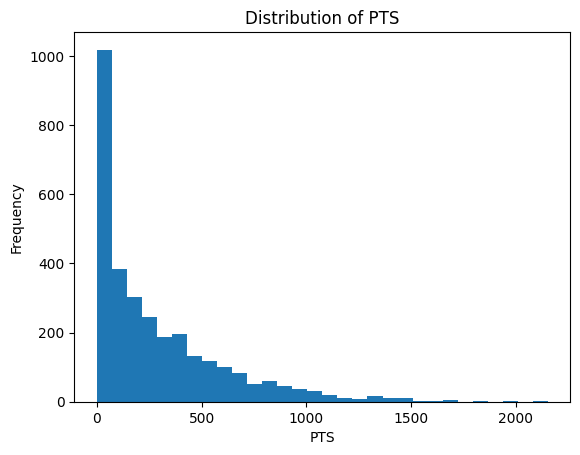

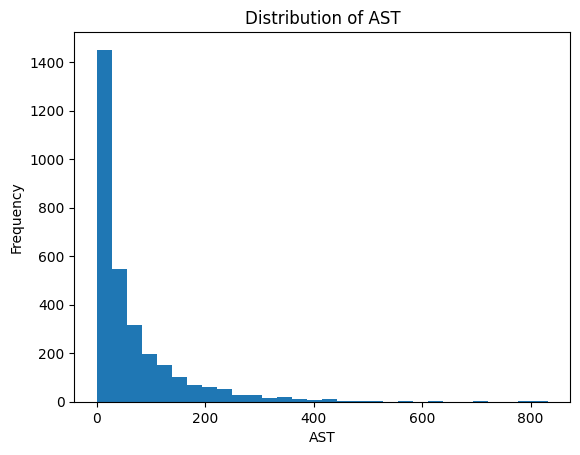

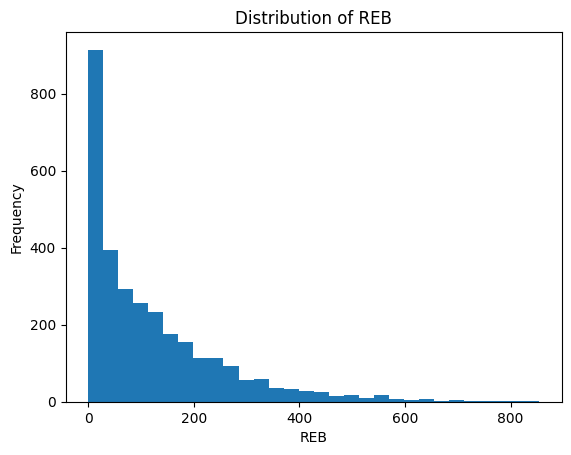

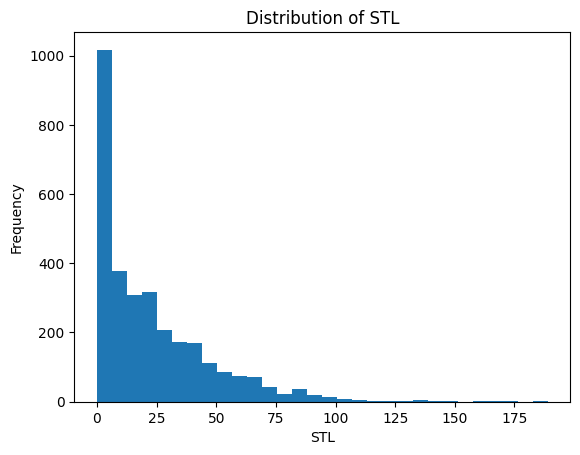

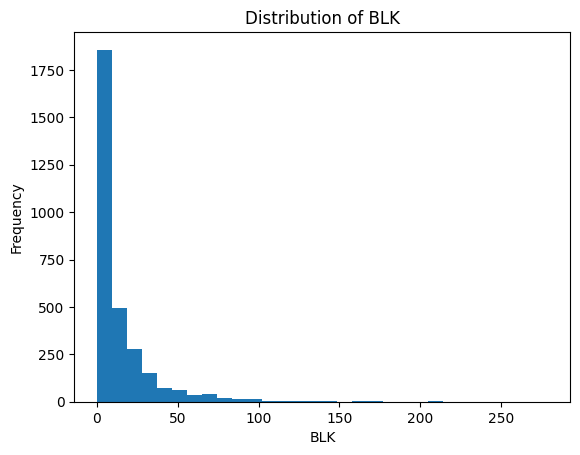

In [ ]:
import matplotlib.pyplot as plt

metrics = ["PTS", "AST", "REB", "STL", "BLK"]

for metric in metrics:
    plt.figure()
    plt.hist(df[metric], bins=30)
    plt.title(f"Distribution of {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.show()


<h1>5.Shooting Efficiency Analysis</h1>

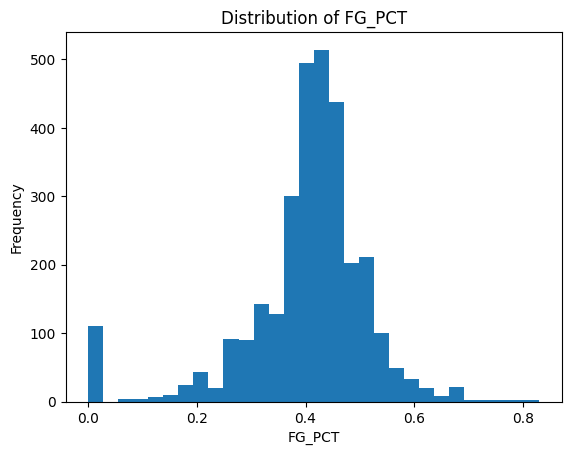

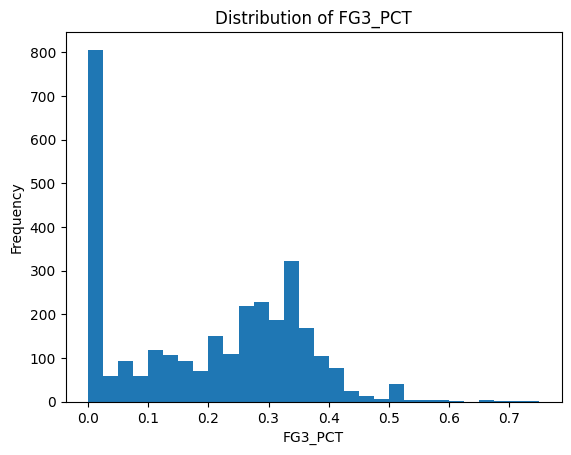

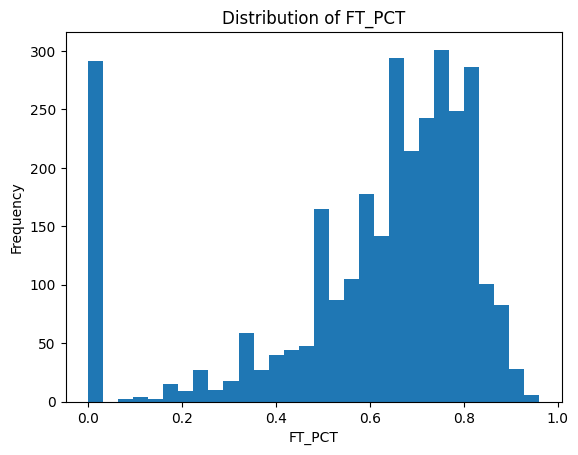

In [ ]:
shooting_metrics = ["FG_PCT", "FG3_PCT", "FT_PCT"]

for metric in shooting_metrics:
    plt.figure()
    plt.hist(df[metric].dropna(), bins=30)
    plt.title(f"Distribution of {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.show()


<h1>6.Games Played vs Points Relationship</h1>

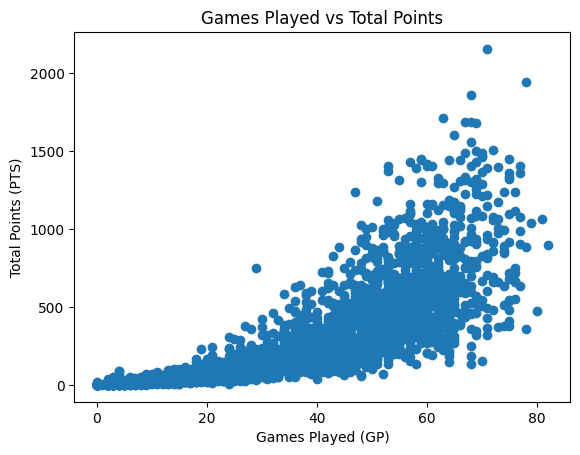

In [ ]:
plt.figure()
plt.scatter(df["GP"], df["PTS"])
plt.xlabel("Games Played (GP)")
plt.ylabel("Total Points (PTS)")
plt.title("Games Played vs Total Points")
plt.show()


<h1>7.Minutes Played vs Points</h1>

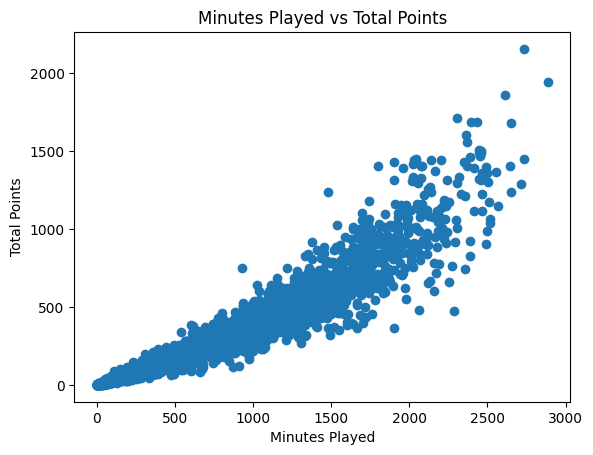

In [ ]:
plt.figure()
plt.scatter(df["MIN"], df["PTS"])
plt.xlabel("Minutes Played")
plt.ylabel("Total Points")
plt.title("Minutes Played vs Total Points")
plt.show()


<h1>8.Correlation Analysis</h1>

In [ ]:
correlation_matrix = df[
    ["PTS", "AST", "REB", "STL", "BLK", "MIN", "TOV"]
].corr()

print(correlation_matrix)


          PTS       AST       REB       STL       BLK       MIN       TOV
PTS  1.000000  0.771468  0.802144  0.845120  0.544510  0.947842  0.934534
AST  0.771468  1.000000  0.496045  0.854736  0.233795  0.782057  0.861976
REB  0.802144  0.496045  1.000000  0.678058  0.794991  0.844510  0.779824
STL  0.845120  0.854736  0.678058  1.000000  0.425357  0.892205  0.879501
BLK  0.544510  0.233795  0.794991  0.425357  1.000000  0.588751  0.524524
MIN  0.947842  0.782057  0.844510  0.892205  0.588751  1.000000  0.927024
TOV  0.934534  0.861976  0.779824  0.879501  0.524524  0.927024  1.000000


In [ ]:
df.columns

Index(['FULL_NAME', 'AST', 'BLK', 'DREB', 'FG3A', 'FG3M', 'FG3_PCT', 'FGA',
       'FGM', 'FG_PCT', 'FTA', 'FTM', 'FT_PCT', 'GP', 'GS', 'MIN', 'OREB',
       'PF', 'PTS', 'REB', 'STL', 'TOV', 'FIRST_NAME', 'LAST_NAME',
       'FULL_NAME_LOWER', 'FIRST_NAME_LOWER', 'LAST_NAME_LOWER', 'IS_ACTIVE'],
      dtype='object')

<h1>9.Performance Tier Distribution</h1>

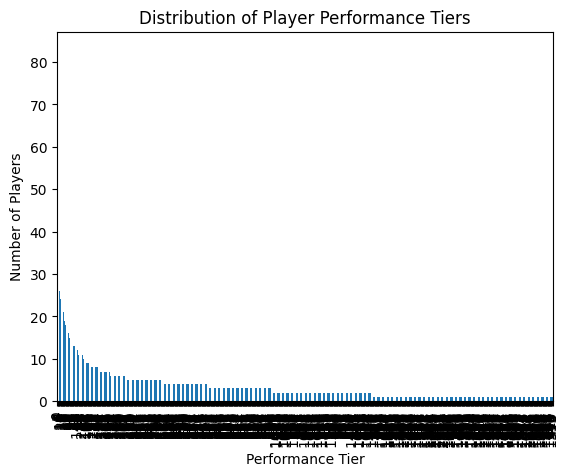

In [ ]:
df["PTS"].value_counts().plot(kind="bar")
plt.title("Distribution of Player Performance Tiers")
plt.xlabel("Performance Tier")
plt.ylabel("Number of Players")
plt.show()

<h1>10.Active vs Inactive Players</h1>

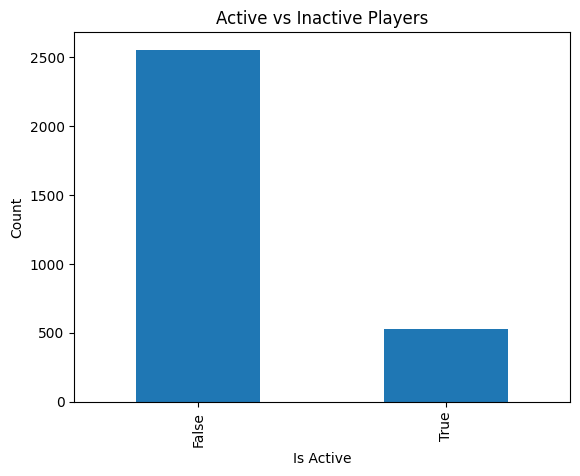

In [ ]:
df["IS_ACTIVE"].value_counts().plot(kind="bar")
plt.title("Active vs Inactive Players")
plt.xlabel("Is Active")
plt.ylabel("Count")
plt.show()


<h1>11.Data Cleaning</h1>

In [ ]:
df = df[df["GP"] > 0]



In [ ]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())



<h1>12.Feature Engineering</h1>

In [ ]:
df["PTS_PER_GAME"] = df["PTS"] / df["GP"]


In [ ]:
def performance_tier(ppg):
    if ppg >= 20:
        return "Superstar"
    elif ppg >= 10:
        return "Starter"
    else:
        return "Role Player"

df["PERFORMANCE_TIER"] = df["PTS_PER_GAME"].apply(performance_tier)


<h1>13.Feature Selection</h1>

In [ ]:
features = [
    "AST", "REB", "STL", "BLK", "PTS",
    "FG_PCT", "FG3_PCT", "FT_PCT",
    "MIN", "TOV"
]

X = df[features]
y = df["PERFORMANCE_TIER"]


<h1>14.Encode Labels</h1>

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


<h1>15.Train-Test Split</h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


<h1>16.Feature Scaling</h1>

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Train MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),   # one hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# 2. Predictions
y_pred = mlp.predict(X_test_scaled)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 4. Print results
print("MLP Classifier Performance")
print("---------------------------")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

# 5. Detailed report (optional but recommended)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

MLP Classifier Performance
---------------------------
Accuracy : 0.9418604651162791
Precision: 0.9406186396223116
Recall   : 0.9418604651162791
F1 Score : 0.9406429591683242

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       489
           1       0.86      0.79      0.82       104
           2       1.00      0.78      0.88         9

    accuracy                           0.94       602
   macro avg       0.94      0.85      0.89       602
weighted avg       0.94      0.94      0.94       602



<h1>17.MODEL 1: Logistic Regression</h1>

In [ ]:
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)


In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(
    y_test, y_pred_lr, average="weighted", zero_division=0
)
lr_recall = recall_score(
    y_test, y_pred_lr, average="weighted", zero_division=0
)
lr_f1 = f1_score(
    y_test, y_pred_lr, average="weighted", zero_division=0
)


print("🔵 Logistic Regression")
print(f"Accuracy : {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall   : {lr_recall:.4f}")
print(f"F1 Score : {lr_f1:.4f}")
print("-" * 40)


🔵 Logistic Regression
Accuracy : 0.9402
Precision: 0.9388
Recall   : 0.9402
F1 Score : 0.9388
----------------------------------------


<h1>Logistic Regression Metrics</h1>

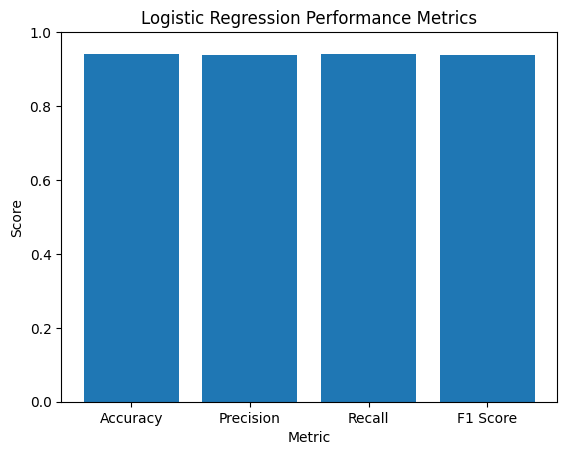

In [ ]:
import matplotlib.pyplot as plt

lr_metrics = [lr_accuracy, lr_precision, lr_recall, lr_f1]
lr_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure()
plt.bar(lr_labels, lr_metrics)
plt.title("Logistic Regression Performance Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.show()


<h1>17.MODEL 2: Random Forest</h1>

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average="weighted", zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average="weighted", zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average="weighted", zero_division=0)


In [ ]:
print("🌲 Random Forest")
print(f"Accuracy : {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall   : {rf_recall:.4f}")
print(f"F1 Score : {rf_f1:.4f}")
print("-" * 40)

🌲 Random Forest
Accuracy : 0.9319
Precision: 0.9296
Recall   : 0.9319
F1 Score : 0.9294
----------------------------------------


<h1>Random Forest Metrics</h1>

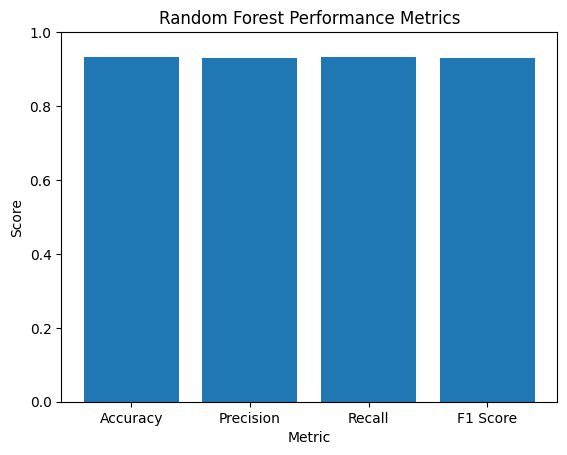

In [ ]:
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]
rf_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure()
plt.bar(rf_labels, rf_metrics)
plt.title("Random Forest Performance Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.show()


#Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter grid
lr_param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"]
}

# Grid Search
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

# Fit
lr_grid.fit(X_train_scaled, y_train)

# Best model
best_lr = lr_grid.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average="weighted", zero_division=0)
lr_recall = recall_score(y_test, y_pred_lr, average="weighted", zero_division=0)
lr_f1 = f1_score(y_test, y_pred_lr, average="weighted", zero_division=0)

print("🔵 Logistic Regression (Tuned)")
print("Best Parameters:", lr_grid.best_params_)
print(f"Accuracy : {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall   : {lr_recall:.4f}")
print(f"F1 Score : {lr_f1:.4f}")
print("-" * 40)

🔵 Logistic Regression (Tuned)
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.9435
Precision: 0.9423
Recall   : 0.9435
F1 Score : 0.9422
----------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Grid Search
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

# Fit
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average="weighted", zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average="weighted", zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average="weighted", zero_division=0)

print("🟢 Random Forest (Tuned)")
print("Best Parameters:", rf_grid.best_params_)
print(f"Accuracy : {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall   : {rf_recall:.4f}")
print(f"F1 Score : {rf_f1:.4f}")
print("-" * 40)

🟢 Random Forest (Tuned)
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy : 0.9302
Precision: 0.9277
Recall   : 0.9302
F1 Score : 0.9277
----------------------------------------


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Train RF for feature importance
rf_selector_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_selector_model.fit(X_train, y_train)

# Select important features
selector_rf = SelectFromModel(
    rf_selector_model,
    threshold="median"   # keeps top 50% important features
)

X_train_rf_selected = selector_rf.fit_transform(X_train, y_train)
X_test_rf_selected = selector_rf.transform(X_test)

print("Original features:", X_train.shape[1])
print("Selected features (RF):", X_train_rf_selected.shape[1])

Original features: 10
Selected features (RF): 5


In [ ]:
# Train Logistic Regression again
lr_final = LogisticRegression(max_iter=1000, random_state=42)
lr_final.fit(X_train_lr_selected, y_train)

# Predictions
y_pred_lr = lr_final.predict(X_test_lr_selected)

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average="weighted", zero_division=0)
lr_recall = recall_score(y_test, y_pred_lr, average="weighted", zero_division=0)
lr_f1 = f1_score(y_test, y_pred_lr, average="weighted", zero_division=0)

print("🔵 Logistic Regression (Feature Selected)")
print(f"Accuracy : {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall   : {lr_recall:.4f}")
print(f"F1 Score : {lr_f1:.4f}")
print("-" * 40)

🔵 Logistic Regression (Feature Selected)
Accuracy : 0.9402
Precision: 0.9389
Recall   : 0.9402
F1 Score : 0.9386
----------------------------------------


In [ ]:
# Train Random Forest again
rf_final = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_final.fit(X_train_rf_selected, y_train)

# Predictions
y_pred_rf = rf_final.predict(X_test_rf_selected)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average="weighted", zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average="weighted", zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average="weighted", zero_division=0)

print("🟢 Random Forest (Feature Selected)")
print(f"Accuracy : {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall   : {rf_recall:.4f}")
print(f"F1 Score : {rf_f1:.4f}")
print("-" * 40)

🟢 Random Forest (Feature Selected)
Accuracy : 0.9336
Precision: 0.9313
Recall   : 0.9336
F1 Score : 0.9315
----------------------------------------


Confusion Matrix - Logistic Regression
[[479  10   0]
 [ 23  81   0]
 [  0   3   6]]


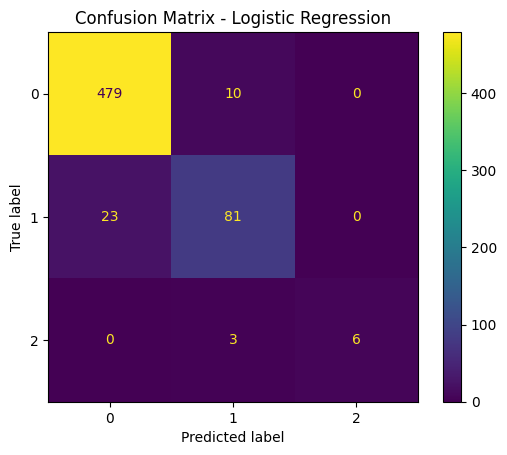

Confusion Matrix - Random Forest
[[478  11   0]
 [ 26  77   1]
 [  0   2   7]]


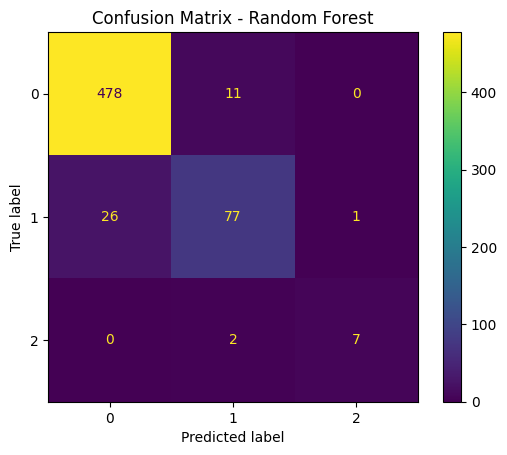

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix - Logistic Regression")
print(cm_lr)

# Plot
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix - Random Forest")
print(cm_rf)

# Plot
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
import pandas as pd

# Create comparison table
comparison_table = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Features Selected": [
        X_train_lr_selected.shape[1],
        X_train_rf_selected.shape[1]
    ],
    "Accuracy": [
        lr_accuracy,
        rf_accuracy
    ],
    "Recall": [
        lr_recall,
        rf_recall
    ],
    "F1 Score": [
        lr_f1,
        rf_f1
    ]
})

# Round values for neat display
comparison_table = comparison_table.round(4)

comparison_table

,Model,Features Selected,Accuracy,Recall,F1 Score
0,Logistic Regression,6,0.9402,0.9402,0.9386
1,Random Forest,5,0.9336,0.9336,0.9315
